# Classification Review - Multiclass Classification
### Multiclass LR, LDA, QDA, KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, plot_confusion_matrix

from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [3]:
from sklearn.datasets import make_blobs, make_classification

##  Randomly generated classification dataset

In [4]:
X,y = make_classification(n_samples = 3000, n_features=2, n_redundant = 0, n_informative=2,
                          n_clusters_per_class  = 1, random_state = 4, class_sep = 3, 
                          flip_y = 0.05, n_classes = 3) 

In [5]:
print("Unique classes in response: %s" % np.unique(np.array(y)))

Unique classes in response: [0 1 2]


In [6]:
print("X has shapes: %s, y has shape: %s" % (X.shape, y.shape))

X has shapes: (3000, 2), y has shape: (3000,)


## Logistic Regression

In [7]:
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [8]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_Train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (2400, 2), Test feature set shape: (600, 2) 
Train set labels shape: (2400,), Test set labels shape: (600,) 


In [9]:
c_param_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

score_results_lr = []

for val in c_param_list:
    log_reg = LogisticRegression(penalty = 'l2', max_iter=100000, C = val, solver = 'lbfgs')
    kfold = KFold(n_splits=10)
    score = cross_val_score(log_reg, X_Train, y_train, cv = kfold, scoring = "accuracy")
    score_results_lr.append(score)
    print("C val: %s, CV Score Avg: %s " % (val, np.mean(score)))

C val: 0.0001, CV Score Avg: 0.9666666666666666 
C val: 0.001, CV Score Avg: 0.9666666666666666 
C val: 0.01, CV Score Avg: 0.9666666666666666 
C val: 0.1, CV Score Avg: 0.9666666666666666 
C val: 1, CV Score Avg: 0.9666666666666666 
C val: 10, CV Score Avg: 0.9666666666666666 
C val: 100, CV Score Avg: 0.9666666666666666 
C val: 1000, CV Score Avg: 0.9666666666666666 


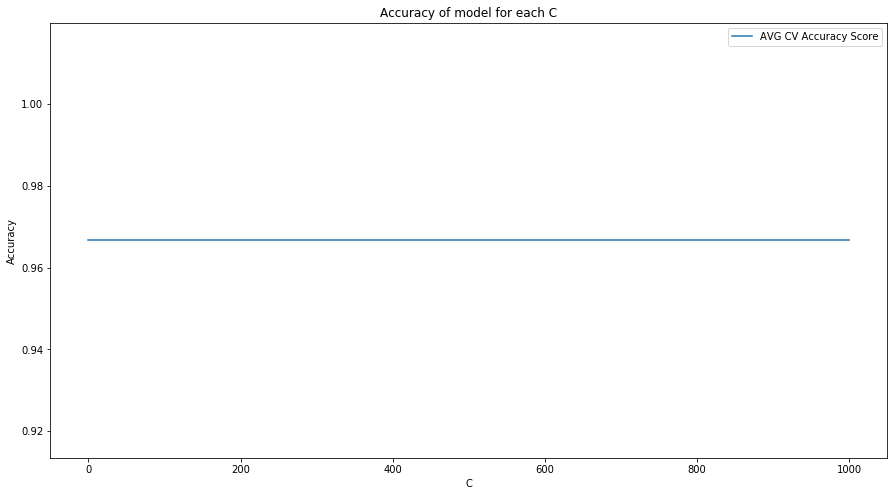

In [10]:
plt.figure(figsize = (15,8)) 
plt.plot(c_param_list, np.mean(np.array(score_results_lr), axis = 1), label = "AVG CV Accuracy Score")
plt.title("Accuracy of model for each C")
plt.xlabel("C")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [11]:
avg_cv_scores = np.mean(np.array(score_results_lr), axis = 1)
max_avg_accuracy_index = np.argmax(avg_cv_scores) 
print("Optimal Value of C: %s" % c_param_list[max_avg_accuracy_index]) # Note: So optimal lambda=1/C

Optimal Value of C: 0.0001


In [12]:
log_reg_optimal = LogisticRegression(penalty = 'l2', max_iter=100000, C = val, solver = 'lbfgs')
opt_mod_log_reg = log_reg_optimal.fit(X,y)
log_reg_optimal.fit(X,y)

y_pred_lr = opt_mod_log_reg.predict(X)
pred_prob_lr = opt_mod_log_reg.predict_proba(X)

In [13]:
print(confusion_matrix(y, y_pred_lr))

[[966  21  14]
 [ 22 960  10]
 [ 12  19 976]]


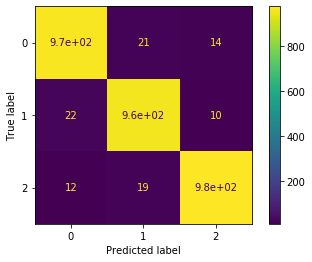

<Figure size 1080x360 with 0 Axes>

In [14]:
plot_confusion_matrix(log_reg_optimal, X, y, display_labels = np.array([0,1,2]))
plt.figure(figsize = (15,5))
plt.show()

In [15]:
print(classification_report(y, y_pred_lr, digits = 6))

              precision    recall  f1-score   support

           0   0.966000  0.965035  0.965517      1001
           1   0.960000  0.967742  0.963855       992
           2   0.976000  0.969215  0.972596      1007

    accuracy                       0.967333      3000
   macro avg   0.967333  0.967331  0.967323      3000
weighted avg   0.967373  0.967333  0.967344      3000



In [16]:
fpr0_lr, tpr0_lr, thresholds0_lr = roc_curve(y, pred_prob_lr[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_lr, tpr0_lr))

fpr1_lr, tpr1_lr, thresholds1_lr = roc_curve(y, pred_prob_lr[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_lr, tpr1_lr))

fpr2_lr, tpr2_lr, thresholds2_lr = roc_curve(y, pred_prob_lr[:,2], pos_label = 2)
print("ROC: AUC Class 2: ", auc(fpr2_lr, tpr2_lr))


p0_lr, r0_lr, thresholds0_lr = precision_recall_curve(y, pred_prob_lr[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_lr, p0_lr))

p1_lr, r1_lr, thresholds1_lr = precision_recall_curve(y, pred_prob_lr[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_lr, p1_lr))

p2_lr, r2_lr, thresholds2_lr = precision_recall_curve(y, pred_prob_lr[:,2], pos_label = 2)
print("Precision-Recall: AUC Class 2:", auc(r2_lr, p2_lr))

ROC: AUC Class 0:  0.975478248614817
ROC: AUC Class 1:  0.9762045567729084
ROC: AUC Class 2:  0.9823309089260275
Precision-Recall: AUC Class 1: 0.9498947157033506
Precision-Recall: AUC Class 1: 0.9551812145305442
Precision-Recall: AUC Class 2: 0.9689570008093754


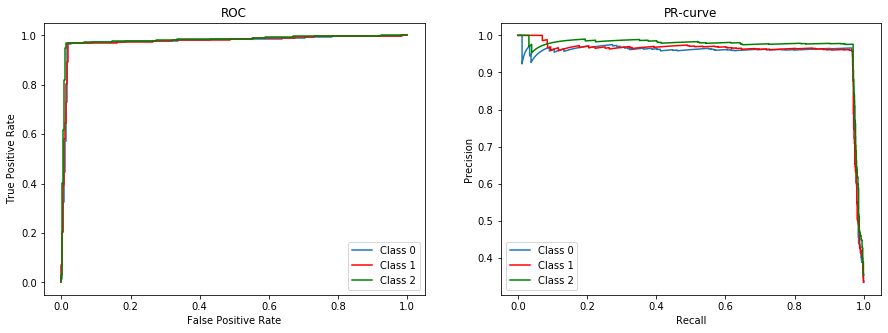

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_lr, tpr0_lr, "-", label = "Class 0")
plt.plot(fpr1_lr, tpr1_lr, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_lr, tpr2_lr, "-", color = 'g', label = "Class 2")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_lr, p0_lr, "-", label = "Class 0")
plt.plot(r1_lr, p1_lr, "-", color = 'r', label = "Class 1")
plt.plot(r2_lr, p2_lr, "-", color = 'g', label = "Class 2")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

## Linear Discriminant Analysis

In [18]:
linear_discriminant_analysis = LinearDiscriminantAnalysis()
mod_lda = linear_discriminant_analysis.fit(X,y)
linear_discriminant_analysis.fit(X,y)

y_pred_lda = mod_lda.predict(X)
pred_prob_lda = mod_lda.predict_proba(X)

In [19]:
print(confusion_matrix(y, y_pred_lda))

[[966  21  14]
 [ 22 960  10]
 [ 12  19 976]]


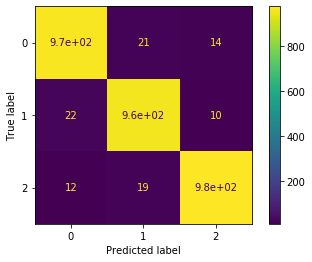

<Figure size 1080x360 with 0 Axes>

In [20]:
plot_confusion_matrix(linear_discriminant_analysis, X, y, display_labels = np.array([0,1,2]))
plt.figure(figsize = (15,5))
plt.show()

In [21]:
print(classification_report(y, y_pred_lda, digits = 6))

              precision    recall  f1-score   support

           0   0.966000  0.965035  0.965517      1001
           1   0.960000  0.967742  0.963855       992
           2   0.976000  0.969215  0.972596      1007

    accuracy                       0.967333      3000
   macro avg   0.967333  0.967331  0.967323      3000
weighted avg   0.967373  0.967333  0.967344      3000



In [22]:
fpr0_lda, tpr0_lda, thresholds0_lda = roc_curve(y, pred_prob_lda[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_lda, tpr0_lda))

fpr1_lda, tpr1_lda, thresholds1_lda = roc_curve(y, pred_prob_lda[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_lda, tpr1_lda))

fpr2_lda, tpr2_lda, thresholds2_lda = roc_curve(y, pred_prob_lda[:,2], pos_label = 2)
print("ROC: AUC Class 2: ", auc(fpr2_lda, tpr2_lda))

p0_lda, r0_lda, thresholds0_lda = precision_recall_curve(y, pred_prob_lda[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_lda, p0_lda))

p1_lda, r1_lda, thresholds1_lda = precision_recall_curve(y, pred_prob_lda[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_lda, p1_lda))

p2_lda, r2_lda, thresholds2_lda = precision_recall_curve(y, pred_prob_lda[:,2], pos_label = 2)
print("Precision-Recall: AUC Class 2:", auc(r2_lda, p2_lda))

ROC: AUC Class 0:  0.9753782985398793
ROC: AUC Class 1:  0.977686532097417
ROC: AUC Class 2:  0.9818949241909743
Precision-Recall: AUC Class 1: 0.9473187901998383
Precision-Recall: AUC Class 1: 0.952859150925701
Precision-Recall: AUC Class 2: 0.9707285358354485


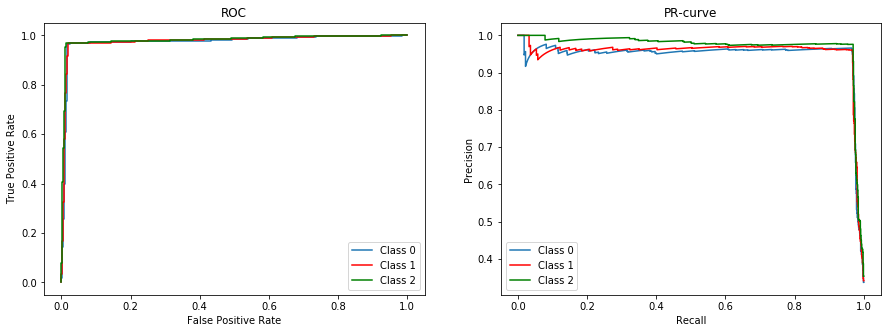

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_lda, tpr0_lda, "-", label = "Class 0")
plt.plot(fpr1_lda, tpr1_lda, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_lda, tpr2_lda, "-", color = 'g', label = "Class 2")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_lda, p0_lda, "-", label = "Class 0")
plt.plot(r1_lda, p1_lda, "-", color = 'r', label = "Class 1")
plt.plot(r2_lda, p2_lda, "-", color = 'g', label = "Class 2")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

## Quadratic Discriminant Analysis

In [24]:
quadratic_discriminant_analysis = QuadraticDiscriminantAnalysis()
mod_qda = quadratic_discriminant_analysis.fit(X,y)
quadratic_discriminant_analysis.fit(X,y)

y_pred_qda = mod_qda.predict(X)
pred_prob_qda = mod_qda.predict_proba(X)

In [25]:
print(confusion_matrix(y, y_pred_qda))

[[966  21  14]
 [ 22 960  10]
 [ 12  19 976]]


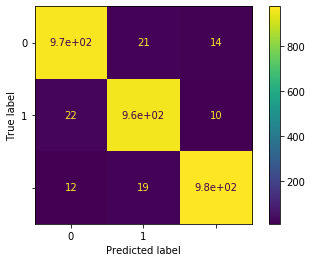

<Figure size 1080x360 with 0 Axes>

In [26]:
plot_confusion_matrix(quadratic_discriminant_analysis, X, y, display_labels = np.array([0,1]))
plt.figure(figsize = (15,5))
plt.show()

In [27]:
print(classification_report(y, y_pred_qda, digits = 6))

              precision    recall  f1-score   support

           0   0.966000  0.965035  0.965517      1001
           1   0.960000  0.967742  0.963855       992
           2   0.976000  0.969215  0.972596      1007

    accuracy                       0.967333      3000
   macro avg   0.967333  0.967331  0.967323      3000
weighted avg   0.967373  0.967333  0.967344      3000



In [28]:
fpr0_qda, tpr0_qda, thresholds0_qda = roc_curve(y, pred_prob_qda[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_qda,tpr0_qda))

fpr1_qda, tpr1_qda, thresholds1_qda = roc_curve(y, pred_prob_qda[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_qda,tpr1_qda))

fpr2_qda, tpr2_qda, thresholds1_qda = roc_curve(y, pred_prob_qda[:,2], pos_label = 2)
print("ROC: AUC Class 2: ", auc(fpr2_qda,tpr2_qda))

p0_qda, r0_qda, thresholds0_qda = precision_recall_curve(y, pred_prob_qda[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_qda,p0_qda))

p1_qda, r1_qda, thresholds1_qda = precision_recall_curve(y, pred_prob_qda[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_qda,p1_qda))

p2_qda, r2_qda, thresholds2_qda = precision_recall_curve(y, pred_prob_qda[:,2], pos_label = 2)
print("Precision-Recall: AUC Class 2:", auc(r2_qda,p2_qda))

ROC: AUC Class 0:  0.9751069340864239
ROC: AUC Class 1:  0.9794380943966071
ROC: AUC Class 2:  0.982495835722945
Precision-Recall: AUC Class 1: 0.9457955005844962
Precision-Recall: AUC Class 1: 0.9622610825102254
Precision-Recall: AUC Class 2: 0.969486242013306


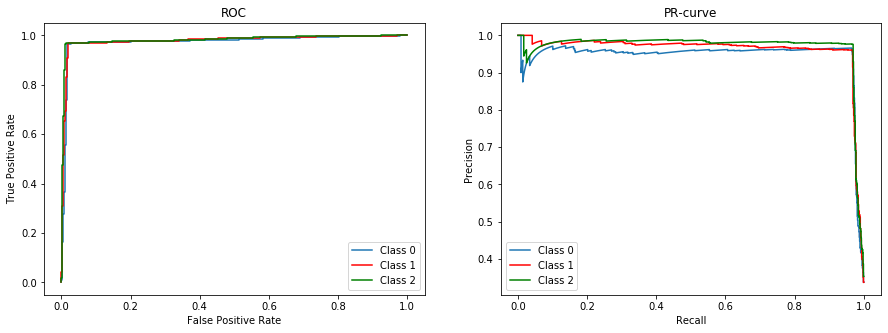

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_qda, tpr0_qda, "-", label = "Class 0")
plt.plot(fpr1_qda, tpr1_qda, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_qda, tpr2_qda, "-", color = 'g', label = "Class 2")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_qda, p0_qda, "-", label = "Class 0")
plt.plot(r1_qda, p1_qda, "-", color = 'r', label = "Class 1")
plt.plot(r2_qda, p2_qda, "-", color = 'g', label = "Class 2")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

## k-NN

In [30]:
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

In [31]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_Train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (2400, 2), Test feature set shape: (600, 2) 
Train set labels shape: (2400,), Test set labels shape: (600,) 


In [32]:
k_value_list = np.arange(1,26)
score_results_knn = []

for val in k_value_list:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn, X_Train, y_train, cv = kfold, scoring = "accuracy")
    score_results_knn.append(score)
    print("k val: %s, CV Score Avg: %s " % (val, np.mean(score)))

k val: 1, CV Score Avg: 0.9433333333333334 
k val: 2, CV Score Avg: 0.9391666666666666 
k val: 3, CV Score Avg: 0.9645833333333333 
k val: 4, CV Score Avg: 0.9683333333333334 
k val: 5, CV Score Avg: 0.96875 
k val: 6, CV Score Avg: 0.96875 
k val: 7, CV Score Avg: 0.96875 
k val: 8, CV Score Avg: 0.96875 
k val: 9, CV Score Avg: 0.96875 
k val: 10, CV Score Avg: 0.96875 
k val: 11, CV Score Avg: 0.96875 
k val: 12, CV Score Avg: 0.96875 
k val: 13, CV Score Avg: 0.96875 
k val: 14, CV Score Avg: 0.96875 
k val: 15, CV Score Avg: 0.96875 
k val: 16, CV Score Avg: 0.96875 
k val: 17, CV Score Avg: 0.96875 
k val: 18, CV Score Avg: 0.96875 
k val: 19, CV Score Avg: 0.96875 
k val: 20, CV Score Avg: 0.96875 
k val: 21, CV Score Avg: 0.96875 
k val: 22, CV Score Avg: 0.96875 
k val: 23, CV Score Avg: 0.96875 
k val: 24, CV Score Avg: 0.96875 
k val: 25, CV Score Avg: 0.96875 


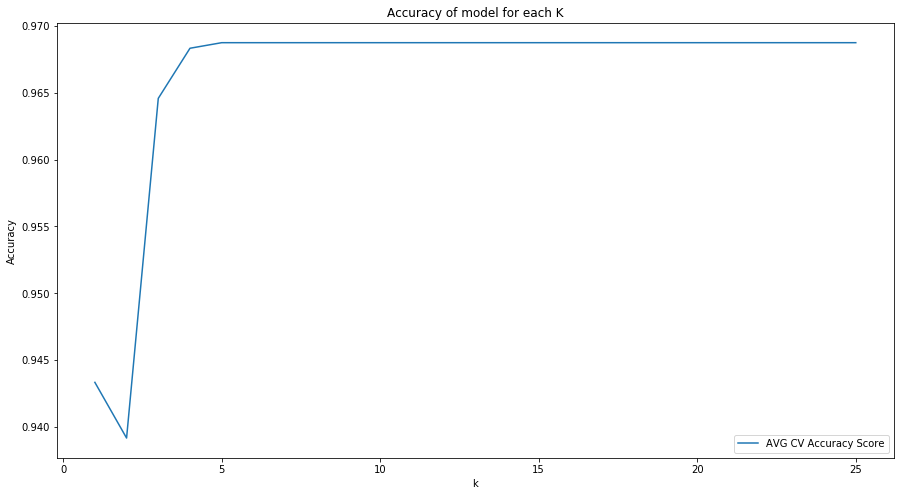

In [33]:
plt.figure(figsize = (15,8)) 
plt.plot(k_value_list, np.mean(np.array(score_results_knn), axis = 1), label = "AVG CV Accuracy Score")
plt.title("Accuracy of model for each K")
plt.xlabel("k")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [34]:
avg_cv_scores_knn = np.mean(np.array(score_results_knn), axis = 1)
max_avg_accuracy_index_knn = np.argmax(avg_cv_scores_knn) 
print("Optimal Value of k: %s" % k_value_list[max_avg_accuracy_index_knn]) 

Optimal Value of k: 5


In [35]:
knn_optimal = KNeighborsClassifier(n_neighbors=7)
opt_mod_knn = knn_optimal.fit(X,y)
knn_optimal.fit(X,y)

y_pred_knn = opt_mod_knn.predict(X)
pred_prob_knn = opt_mod_knn.predict_proba(X)

In [36]:
print(confusion_matrix(y, y_pred_knn))

[[966  21  14]
 [ 22 960  10]
 [ 12  19 976]]


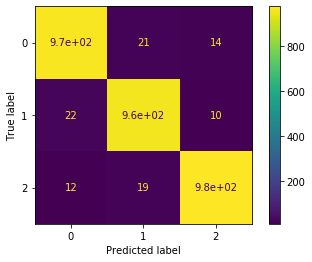

<Figure size 1080x360 with 0 Axes>

In [37]:
plot_confusion_matrix(knn_optimal, X, y, display_labels = np.array([0,1,2]))
plt.figure(figsize = (15,5))
plt.show()

In [38]:
print(classification_report(y, y_pred_knn, digits = 6))

              precision    recall  f1-score   support

           0   0.966000  0.965035  0.965517      1001
           1   0.960000  0.967742  0.963855       992
           2   0.976000  0.969215  0.972596      1007

    accuracy                       0.967333      3000
   macro avg   0.967333  0.967331  0.967323      3000
weighted avg   0.967373  0.967333  0.967344      3000



In [39]:
fpr0_knn, tpr0_knn, thresholds0_knn = roc_curve(y, pred_prob_knn[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_knn, tpr0_knn))

fpr1_knn, tpr1_knn, thresholds1_knn = roc_curve(y, pred_prob_knn[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_knn, tpr1_knn))

fpr2_knn, tpr2_knn, thresholds2_knn = roc_curve(y, pred_prob_knn[:,2], pos_label = 2)
print("ROC: AUC Class 2: ", auc(fpr2_knn, tpr2_knn))

p0_knn, r0_knn, thresholds0_knn = precision_recall_curve(y, pred_prob_knn[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_knn, p0_knn))

p1_knn, r1_knn, thresholds1_knn = precision_recall_curve(y, pred_prob_knn[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_knn, p1_knn))

p2_knn, r2_knn, thresholds2_knn = precision_recall_curve(y, pred_prob_knn[:,2], pos_label = 2)
print("Precision-Recall: AUC Class 2:", auc(r2_knn, p2_knn))

ROC: AUC Class 0:  0.9961966497734382
ROC: AUC Class 1:  0.9958291832669323
ROC: AUC Class 2:  0.9976389558090856
Precision-Recall: AUC Class 1: 0.9932373598010003
Precision-Recall: AUC Class 1: 0.9920947618283429
Precision-Recall: AUC Class 2: 0.9957564621997206


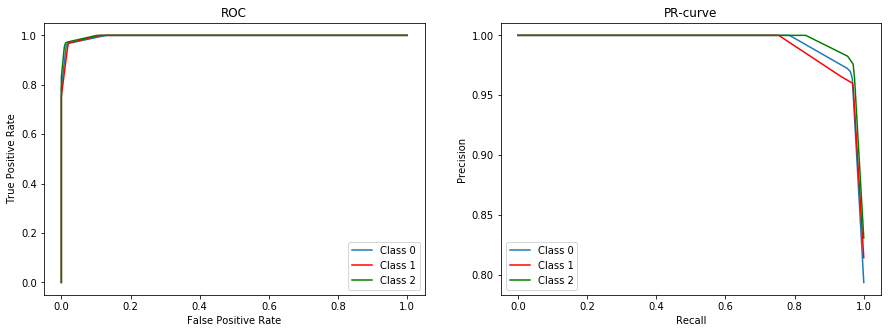

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_knn, tpr0_knn, "-", label = "Class 0")
plt.plot(fpr1_knn, tpr1_knn, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_knn, tpr2_knn, "-", color = 'g', label = "Class 2")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_knn, p0_knn, "-", label = "Class 0")
plt.plot(r1_knn, p1_knn, "-", color = 'r', label = "Class 1")
plt.plot(r2_knn, p2_knn, "-", color = 'g', label = "Class 2")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

## Classification Models ROC curves

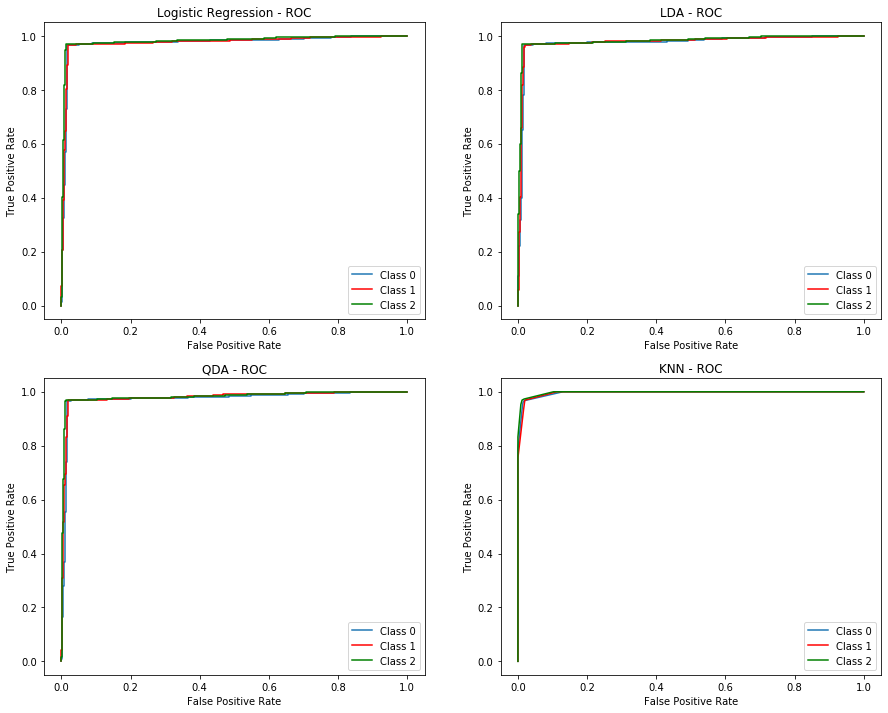

In [41]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
plt.plot(fpr0_lr, tpr0_lr, "-", label = "Class 0")
plt.plot(fpr1_lr, tpr1_lr, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_lr, tpr2_lr, "-", color = 'g', label = "Class 2")
plt.title("Logistic Regression - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(2,2,2)
plt.plot(fpr0_lda, tpr0_lda, "-", label = "Class 0")
plt.plot(fpr1_lda, tpr1_lda, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_lda, tpr2_lda, "-", color = 'g', label = "Class 2")
plt.title("LDA - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(2,2,3)
plt.plot(fpr0_qda, tpr0_qda, "-", label = "Class 0")
plt.plot(fpr1_qda, tpr1_qda, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_qda, tpr2_qda, "-", color = 'g', label = "Class 2")
plt.title("QDA - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(2,2,4)
plt.plot(fpr0_knn, tpr0_knn, "-", label = "Class 0")
plt.plot(fpr1_knn, tpr1_knn, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_knn, tpr2_knn, "-", color = 'g', label = "Class 2")
plt.title("KNN - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

## Classification Models PR curves

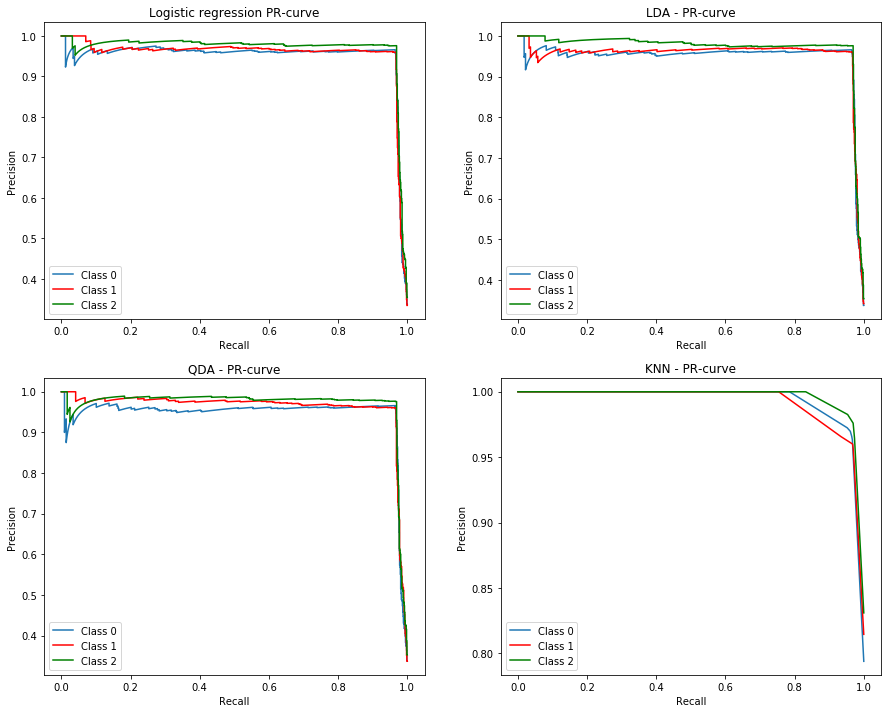

In [42]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
plt.plot(r0_lr, p0_lr, "-", label = "Class 0")
plt.plot(r1_lr, p1_lr, "-", color = 'r', label = "Class 1")
plt.plot(r2_lr, p2_lr, "-", color = 'g', label = "Class 2")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic regression PR-curve")

plt.subplot(2,2,2)
plt.plot(r0_lda, p0_lda, "-", label = "Class 0")
plt.plot(r1_lda, p1_lda, "-", color = 'r', label = "Class 1")
plt.plot(r2_lda, p2_lda, "-", color = 'g', label = "Class 2")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("LDA - PR-curve")

plt.subplot(2,2,3)
plt.plot(r0_qda, p0_qda, "-", label = "Class 0")
plt.plot(r1_qda, p1_qda, "-", color = 'r', label = "Class 1")
plt.plot(r2_qda, p2_qda, "-", color = 'g', label = "Class 2")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("QDA - PR-curve")

plt.subplot(2,2,4)
plt.plot(r0_knn, p0_knn, "-", label = "Class 0")
plt.plot(r1_knn, p1_knn, "-", color = 'r', label = "Class 1")
plt.plot(r2_knn, p2_knn, "-", color = 'g', label = "Class 2")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("KNN - PR-curve")

plt.show()